In [249]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
start = "1989-01-01"
end   = "2021-10-01"

### Indizes

In [251]:
# ind_gb     = ['^FTSE']
ind_german   = ['^GDAXI', '^MDAXI','^SDAXI']
ind_euro     = ['^STOXX50E']
ind_usa      = ['^DJI','^GSPC','^IXIC']        # DowJones, S&P 500, NASDAQ
ind_russland = ['IMOEX.ME', 'RTSI.ME']         # MOEX Russia Index, RTS Index
ind_japan  =   ['^N225']
ind_hong   =   ['^HSI']

vix = '^VIX'

all_indizes = ind_german+ind_euro+ind_usa+ind_japan+ind_hong
all_labels = ['DAX', 'MDAX', 'SDAX', 'STOXX50E', 'DowJones', 'SP500', 'NASDAQ', 'Nikkei225', 'HANGSENG']

imp_indizes = ['^GDAXI','^DJI','^N225']
imp_labels  = ['DAX','DowJones','Nikkei225']


In [252]:
def read_stocks(wkns:[]=None, names:[]=None, start_input=None,end_input=None):
    """
    :param wkns:
    :param names:
    :return:
    """

    for name, wkn in zip(names,wkns):
        exec("{} = web.DataReader(wkn, data_source='yahoo', start = start_input, end = end_input)".format(name))

    print(names)



read_stocks(wkns=imp_indizes, names=imp_labels,start_input=start,end_input=end)

['DAX', 'DowJones', 'Nikkei225']


In [253]:
# Alle Indizes
# DAX, MDAX, SDAX, STOXX50E, DowJones, SP500, NASDAQ, Nikkei225, HANGSENG

def merge_stocks(df_names:[]=None,names:[]=None):
    stocks = pd.concat(df_names, axis=1,keys=names)
    stocks.columns.names = ['Stock Ticker','Stock Info']
    return stocks


indizes = merge_stocks(df_names=[DAX, DowJones, Nikkei225],names= imp_labels)
indizes

Stock Ticker           DAX                                            \
Stock Info            High           Low          Open         Close   
Date                                                                   
2000-01-03     7159.330078   6720.870117   6961.720215   6750.759766   
2000-01-04     6755.359863   6510.459961   6747.240234   6586.950195   
2000-01-05     6585.850098   6388.910156   6585.850098   6502.069824   
2000-01-06     6539.310059   6402.629883   6501.450195   6474.919922   
2000-01-07     6791.529785   6470.140137   6489.939941   6780.959961   
...                    ...           ...           ...           ...   
2021-09-27    15704.049805  15552.089844  15699.009766  15573.879883   
2021-09-28    15542.410156  15232.969727  15542.030273  15248.559570   
2021-09-29    15422.750000  15301.349609  15357.000000  15365.269531   
2021-09-30    15448.519531  15246.000000  15434.330078  15260.690430   
2021-10-01    15262.750000  14983.799805  15041.599609  15156.440430   

Stock Ticker                                DowJones                \
Stock Info        Volume     Adj Close          High           Low   
Date                                                                 
2000-01-03    43072500.0   6750.759766  11522.009766  11305.690430   
2000-01-04    46678400.0   6586.950195  11350.059570  10986.450195   
2000-01-05    52682800.0   6502.069824  11215.099609  10938.669922   
2000-01-06    41180600.0   6474.919922  11313.450195  11098.450195   
2000-01-07    56058900.0   6780.959961  11528.139648  11239.919922   
...                  ...           ...           ...           ...   
2021-09-27    59034800.0  15573.879883  35061.121094  34739.269531   
2021-09-28    75174800.0  15248.559570  34798.210938  34254.648438   
2021-09-29    56303700.0  15365.269531  34580.421875  34305.960938   
2021-09-30    74664500.0  15260.690430  34557.371094  33833.320312   
2021-10-01    66029600.0  15156.440430  34490.558594  33785.539062   

Stock Ticker                                                         \
Stock Info            Open         Close       Volume     Adj Close   
Date                                                                  
2000-01-03    11501.849609  11357.509766  169750000.0  11357.509766   
2000-01-04    11349.750000  10997.929688  178420000.0  10997.929688   
2000-01-05    10989.370117  11122.650391  203190000.0  11122.650391   
2000-01-06    11113.370117  11253.259766  176550000.0  11253.259766   
2000-01-07    11247.059570  11522.559570  184900000.0  11522.559570   
...                    ...           ...          ...           ...   
2021-09-27    34739.269531  34869.371094  289480000.0  34869.371094   
2021-09-28    34747.699219  34299.988281  379020000.0  34299.988281   
2021-09-29    34360.078125  34390.718750  290350000.0  34390.718750   
2021-09-30    34467.980469  33843.921875  354830000.0  33843.921875   
2021-10-01    33930.699219  34326.460938  427580000.0  34326.460938   

Stock Ticker     Nikkei225                                            \
Stock Info            High           Low          Open         Close   
Date                                                                   
2000-01-03             NaN           NaN           NaN           NaN   
2000-01-04    19187.609375  18937.449219  18937.449219  19002.859375   
2000-01-05    19003.509766  18221.820312  19003.509766  18542.550781   
2000-01-06    18582.740234  18168.269531  18574.009766  18168.269531   
2000-01-07    18285.730469  18068.099609  18194.050781  18193.410156   
...                    ...           ...           ...           ...   
2021-09-27    30414.609375  30197.400391  30277.820312  30240.060547   
2021-09-28    30207.630859  30001.990234  30142.380859  30183.960938   
2021-09-29    29679.259766  29329.160156  29611.919922  29544.289062   
2021-09-30    29622.269531  29311.339844  29569.189453  29452.660156   
2021-10-01    29393.669922  28680.730469  29235.109375  28771.070312   

Stock 

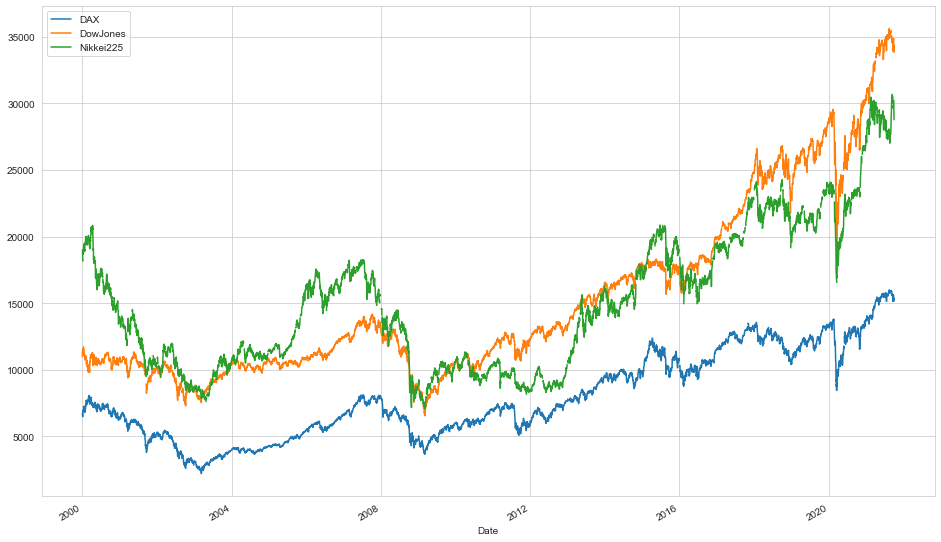

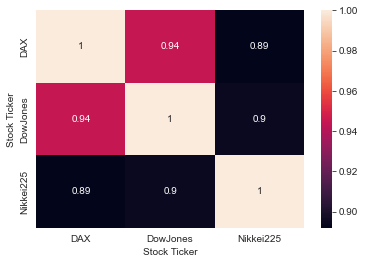

In [256]:
def plot_stocks(df_stock:[]=None,names:[]= None):
    sns.set_style('whitegrid')
    import cufflinks as cf
    cf.go_offline()

    for name in names:
        df_stock[name]['Close'].plot(figsize=(16,10),label=name)

    df_stock.xs(key='Close',axis=1,level='Stock Info').iplot()
    plt.grid(True)
    plt.legend()
    plt.show()
    sns.heatmap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

plot_stocks(df_stock=indizes,names=imp_labels)